<a href="https://colab.research.google.com/github/adiu19/mnist-digit-recognition/blob/main/MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import os
import math
import random

%matplotlib inline

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils
from keras.models import Sequential

In [57]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [58]:
if torch.cuda.is_available():
    device = torch.device('cuda')
print('Using device: {}'.format(device))

Using device: cpu


In [59]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [60]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


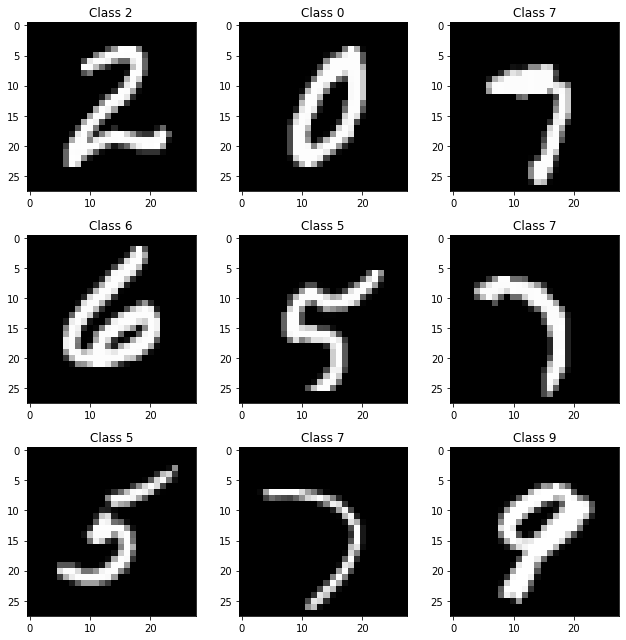

In [61]:
#viewing samples images
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [62]:
#reshape matrices into vectors
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [63]:
nb_classes = 10 #num digits

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [64]:
model = Sequential()

In [65]:
#first hidden layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#second hidden layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(10))
model.add(Activation('softmax'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
activation_10 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [66]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [67]:
model.fit(x_train, y_train, batch_size=256, epochs=3,verbose=1)

Epoch 1/3
235/235 [==============================] - 6s 22ms/step - loss: 0.2949 - accuracy: 0.9125
Epoch 2/3
235/235 [==============================] - 5s 22ms/step - loss: 0.1127 - accuracy: 0.9657
Epoch 3/3
235/235 [==============================] - 5s 22ms/step - loss: 0.0783 - accuracy: 0.9760


In [68]:
score = model.evaluate(x_test, y_test)
print('Score:', score[0])
print('Accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9761
Score: 0.0734022855758667
Accuracy: 0.9761000275611877


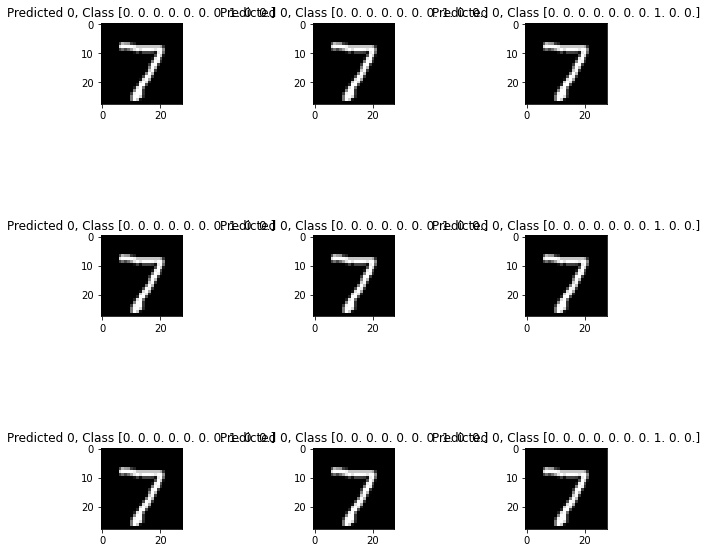

In [74]:
predicted_classes = [0,1,2,3,4,5,6,7,8,9]

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()